# Preliminaries

Importing python packages and setting display parameters

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import thesis_EAfunc as EAf
import thesis_visfunc as EAv

In [3]:
%matplotlib inline

plt.style.use("default")
plt.style.use("bmh")
# plt.rcParams.update({"figure.autolayout": True})
plt.rcParams["figure.figsize"] = (12, 9)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 100


In [4]:
pd.set_option("display.latex.repr", True)

In [ ]:
pd.set_option("display.latex.longtable", True)

# Fitness Landscape Definition

In [5]:
# Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

# Known minimum
x_point = -6.01717
y_point = 9.06022

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

# Problem definition


def g(x, y):
    mag = np.sqrt(x ** 2.0 + y ** 2.0)
    return -(50.0 * np.sinc(mag / np.pi) - mag)


def f(x, y):
    x_min = -6.01717
    y_min = 9.06022
    f_min = (
        g(x_min + 11.0, y_min + 9.0)
        + g(x_min - 11.0, y_min - 3.0)
        + g(x_min + 6.0, y_min - 9.0)
    )
    tripsinc = (
        g(x + 11.0, y + 9.0) + g(x - 11.0, y - 3.0) + g(x + 6.0, y - 9.0) - (f_min)
    )
    return tripsinc

In [6]:
# Testing the minimum
print(f(-6.01717, 9.06022))

0.0


In [7]:
# Testing the function
print(f(-1.0, -1.0), f(-11.0, -9.0), f(11.0, 3.0), f(-6.0, 9.0))

50.62059878583003 5.177364279021976 6.107247239602234 0.031278340140559635


## Visualizing Landscape

In [8]:
# Visualization parameters
grph_steps = 61
a = 15
b = -60
ratio_w = 1.3
ln = 0.75

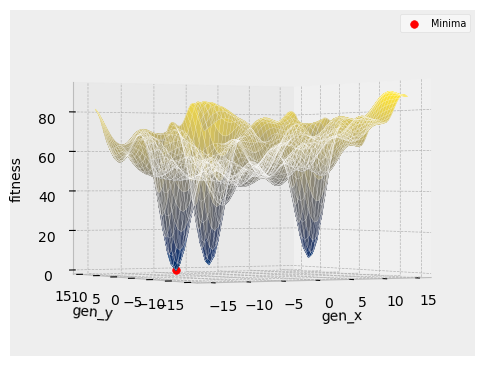

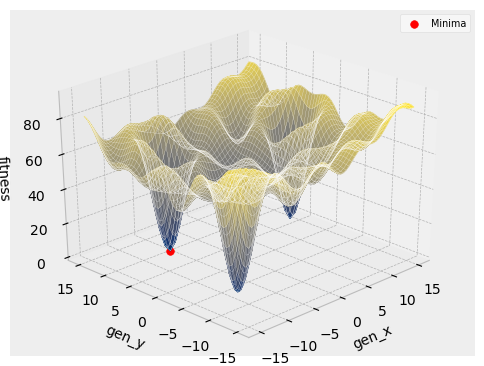

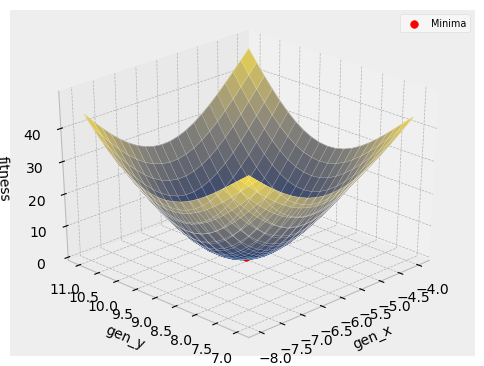

In [91]:
def plot_land(f, domain, point, steps, a=30, b=-60, imgsize=(15, 10), 
              min_f='None', ratio_w=1.5, ln=1):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    
    (x_min, x_max, y_min, y_max) = domain
    (x_plot, y_plot) = point

    # Create arrays
    # # meshgrid produces all combinations of given x and y
    x = np.linspace(x_min, x_max, steps)
    y = np.linspace(y_min, y_max, steps)
    X, Y = np.meshgrid(x, y)  # combine all x with all y
    # # Applying the function
    Z = f(X, Y)

    # Set up the axes
    imgsize=(6,4.5)
    fig = plt.figure(figsize=imgsize)
    ax = fig.gca(projection='3d')

    # Plotting the surface
    # # Some values for the surface plot
    norm = plt.Normalize(Z.min(), Z.max())
    colors = cm.cividis(norm(Z))
    rcount, ccount, _ = colors.shape
    ax.view_init(a, b)  # Visualization angles
    
    # # Plotting surface
    surf = ax.plot_surface(X, Y, Z, rcount=rcount,
                           ccount=ccount, facecolors=colors, shade=False)
    ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, linewidth=.15, color="white")
    
    # # Plotting points
    ax.scatter(x_plot, y_plot, f(x_plot, y_plot),
               color='r', s=30, label='Minima')
    
    #surf.set_facecolor((0, 0, 0, 0))
    if min_f != 'None':
        ax.set_zlim(bottom=min_f)
    ax.set_xlabel('gen_x', fontsize="medium")
    ax.set_ylabel('gen_y', fontsize="medium")
    ax.set_zlabel('fitness', fontsize="medium")
    # ax.set_aspect('auto')
    # ax.autoscale_view(True, True, True, True)
    ax.legend(facecolor="white", framealpha=0.5, fontsize="x-small")

    plt.show()

plot_land(
    f, domain, point, grph_steps, a=0, b=-120, imgsize=img_size, ratio_w=ratio_w, ln=ln, min_f=0
)

plot_land(
    f, domain, point, grph_steps, a=30, b=-135, imgsize=img_size, ratio_w=ratio_w, ln=ln, min_f=0
)

domain_min = (-8, -4, 7, 11)
plot_land(
    f, domain_min, point, 21, a=30, b=-135, imgsize=img_size, ratio_w=ratio_w, ln=ln, min_f=0
)

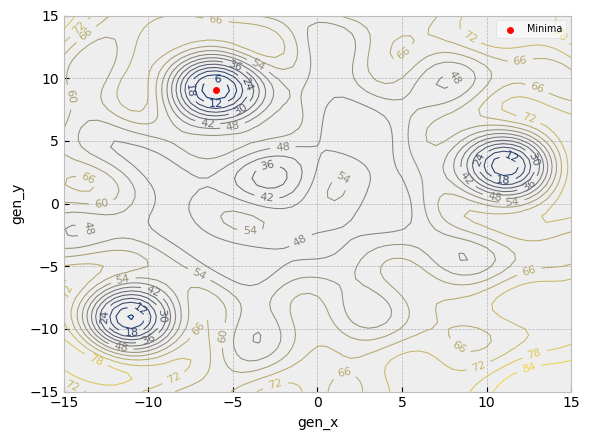

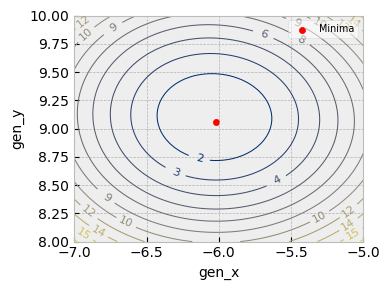

No handles with labels found to put in legend.


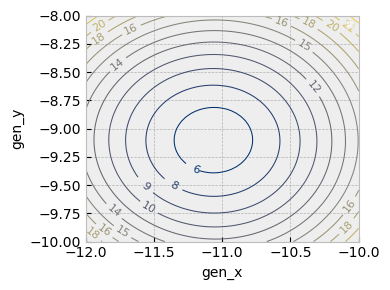

No handles with labels found to put in legend.


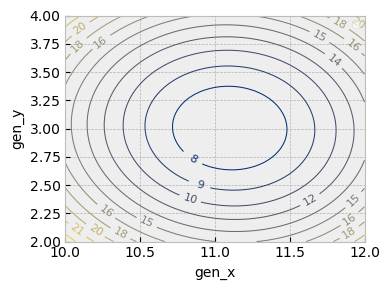

In [80]:
def plot_land_2d(f, domain, point, steps, a=30, b=-60, imgsize=(15, 10), min_f='None', ratio_w=1.5, ln=1):
    (x_min, x_max, y_min, y_max) = domain
    if point != "None":
        (x_plot, y_plot) = point

    # Create arrays
    # # meshgrid produces all combinations of given x and y
    x = np.linspace(x_min, x_max, steps)
    y = np.linspace(y_min, y_max, steps)
    X, Y = np.meshgrid(x, y)  # combine all x with all y
    # # Applying the function
    Z = f(X, Y)

    # Set up the axes with gridspec
    fig, ay = plt.subplots(figsize=imgsize)
    
    # Plotting level curves
    # # Plotting points
    if point != "None":
        ay.scatter(x_plot, y_plot, color='r', s=20, label='Minima')
    # # Plotting contour
    levels = 15
    CS = ay.contour(X, Y, Z, levels, cmap='cividis', linewidths=ln)
    ay.clabel(CS, fmt='%2.0f', inline=True, fontsize=8)
    ay.set_xlabel('gen_x', fontsize="medium")
    ay.set_ylabel('gen_y', fontsize="medium")
    # ay.set_aspect('auto')
    ay.autoscale_view(True, True, True)
    ay.legend(facecolor="white", framealpha=0.5, fontsize="x-small")

    # adjusting
    plt.tight_layout()
    plt.show()

imgsize_single = (6,4.5)
plot_land_2d(f, domain, point, grph_steps, a=0, b=60, imgsize=imgsize_single, ratio_w=ratio_w, ln=ln, min_f=0)

imgsize_single_min = (4,3)
domain_min = (-7, -5, 8, 10)
plot_land_2d(f, domain_min, point, grph_steps, a=0, b=60, imgsize=imgsize_single_min, ratio_w=ratio_w, ln=ln, min_f=0)

domain_min = (-12, -10, -10, -8)
pointn="None"
plot_land_2d(f, domain_min, pointn, grph_steps, a=0, b=60, imgsize=imgsize_single_min, ratio_w=ratio_w, ln=ln, min_f=0)

domain_min = (11-1, 11+1, 3-1, 3+1)
plot_land_2d(f, domain_min, pointn, grph_steps, a=0, b=60, imgsize=imgsize_single_min, ratio_w=ratio_w, ln=ln, min_f=0)

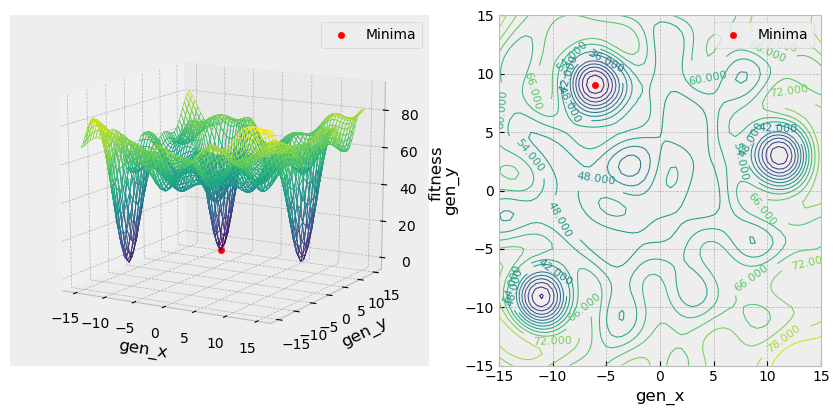

In [9]:
EAv.EA_plt_land(
    f, domain, point, grph_steps, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln
)

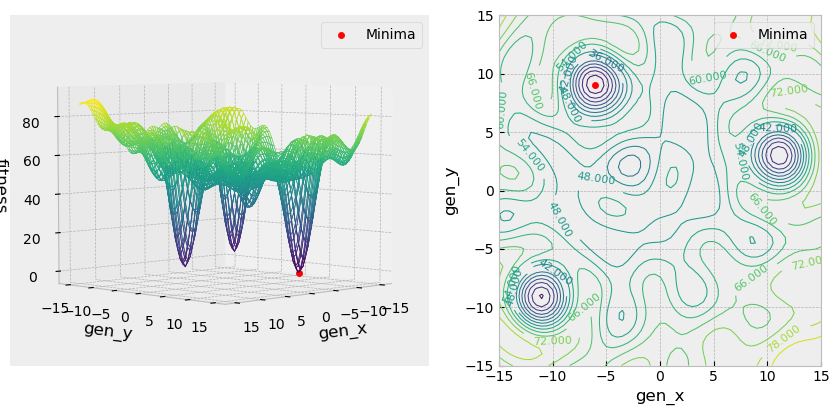

In [15]:
EAv.EA_plt_land(
    f, domain, point, grph_steps, a=510, b=45, imgsize=img_size, ratio_w=ratio_w, ln=ln
)

In [ ]:
domain_min = (-8, -4, 7, 11)
EAv.EA_plt_land(
    f, domain_min, point, 21, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln
)

# Running the Evolutionary Algorithm

## Setting the EA's parameters

In [9]:
# starting seed
np.random.seed(42)

In [ ]:
# Algorithm parameters
# Number of replicates, and generations per experiment
rep_n = 1
gen_f = 50

# Population size
pop_s = 20

# Parent subpopulation's selection method and size
par_selection = "fitness_proportional_selection"

b = 3
par_s = b * pop_s

# Progeny subpopulation's and size
prog_s = par_s
# Crossover Method
crossover = "uniform"
# Mutation method, probability and size
mutation = "random_all_gau_dis"
mut_p = 0.5
mut_s = 2.5

# Survivors (New population) selection method
sur_selection = "tournament_k3"

## Single Run of the EA Experiments
1 Experiment
L-> 1 Parameter set for the experiment.
>L-> 1 Replicate.
>>L-> The replicate is affected due to the randomness seed.

In [ ]:
%%time
genera_res, fitness_res = EAf.EA_exp(
    rep_n,
    gen_f,
    f,
    domain,
    pop_s,
    par_s,
    prog_s,
    mut_p,
    mut_s,
    par_selection,
    crossover,
    mutation,
    sur_selection,
)

We query the members of the population of the last generation

In [12]:
z = gen_f
query = genera_res["generation"] == z
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
4000,0,50.0,2998.0,population,0.079279,-6.10067,9.089157
4001,0,50.0,2844.0,population,0.079279,-6.10067,9.089157
4002,0,50.0,2852.0,population,0.079279,-6.10067,9.089157
4003,0,50.0,2852.0,population,0.079279,-6.10067,9.089157
4004,0,50.0,2976.0,population,0.079279,-6.10067,9.089157
4005,0,50.0,2998.0,population,0.079279,-6.10067,9.089157
4006,0,50.0,2981.0,population,0.079279,-6.10067,9.089157
4007,0,50.0,3011.0,population,0.079279,-6.10067,9.089157
4008,0,50.0,3001.0,population,0.079279,-6.10067,9.089157
4009,0,50.0,2937.0,population,0.079279,-6.10067,9.089157


### Visualization

#### Fitness development

In [ ]:
EAv.EA_fitn_dev(fitness_res, 0)

#### Population dynamics

First generation and its progeny

In [ ]:
run_s = 0  # First (and only) run
gen_s = 0  # First generation
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    gen_s,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)

Dynamics of the population

In [ ]:
print("Generation 0")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    0,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 5")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    5,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 10")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    10,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 20")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    20,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 30")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    30,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 40")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    40,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 45")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    45,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 50")
EAv.EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    50,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)

Dynamics of the population and its progeny

In [ ]:
print("Generation 0")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    0,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 5")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    5,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 10")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    10,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 20")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    20,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 30")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    30,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 40")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    40,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 45")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    45,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 49")
EAv.EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    49,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)

## 100 Executions of the EA
1 Experiment
>L-> 1 Parameter set for the experiment.
>>L-> 100 Replicate.
>>>L-> Each replicate is different due to randomness effects.

### Changing parameters

In [ ]:
# Restarting seed
np.random.seed(42)

# Algorithm parameters
# Number of replicates
rep_n = 100
# Number of generations
gen_f = 200

### Execution

In [ ]:
%%time
fitness_res = EAf.EA_exp_only_fitness(
    rep_n,
    gen_f,
    f,
    domain,
    pop_s,
    par_s,
    prog_s,
    mut_p,
    mut_s,
    par_selection,
    crossover,
    mutation,
    sur_selection,
)

In [19]:
fitness_res.head()

,run,seed,generation,fitness_min,fitness_max,fitness_mean,fitness_std
0,0,7270,0,26.790912,75.958148,56.565127,11.845234
1,0,7270,1,8.542379,56.068358,27.330938,8.069303
2,0,7270,2,8.542379,26.790912,10.367232,5.616780
3,0,7270,3,8.542379,26.790912,10.508916,5.194838
4,0,7270,4,8.487795,8.790512,8.549327,0.059189


In [20]:
fitness_res.tail()

,run,seed,generation,fitness_min,fitness_max,fitness_mean,fitness_std
20095,99,5136,196,6.143568,6.143568,6.143568,0.000000
20096,99,5136,197,6.143568,6.143568,6.143568,0.000000
20097,99,5136,198,6.143568,42.969295,10.504176,10.873907
20098,99,5136,199,6.143568,25.856589,7.129219,4.407966
20099,99,5136,200,6.143568,6.143568,6.143568,0.000000


### Data Analysis

Top 10 fittest

In [21]:
z = gen_f
query = fitness_res["generation"] == z
fitness_res[query].sort_values(by=["fitness_min"]).head(10)

,run,seed,generation,fitness_min,fitness_max,fitness_mean,fitness_std
11054,54,5811,200,0.000013,50.475402,4.798390,14.791200
14672,72,4387,200,0.000040,35.744862,2.851162,9.083969
15074,74,5797,200,0.001055,8.572704,0.429637,1.916679
12059,59,8376,200,0.001166,0.001166,0.001166,0.000000
10250,50,3024,200,0.001174,12.200409,0.611135,2.727832
16079,79,3464,200,0.001534,37.839706,2.647460,8.941699
6833,33,5919,200,0.003214,19.747924,0.990449,4.415051
19898,98,5919,200,0.003214,19.747924,0.990449,4.415051
15878,78,4947,200,0.003383,54.177705,4.089200,13.297293
14471,71,6899,200,0.003563,44.975292,2.774307,10.203136


Top 10 least fit

In [22]:
fitness_res[query].sort_values(by=["fitness_min"], ascending=False).head(10)

,run,seed,generation,fitness_min,fitness_max,fitness_mean,fitness_std
6230,30,217,200,6.164482,6.164482,6.164482,0.000000
19295,95,217,200,6.164482,6.164482,6.164482,0.000000
13868,68,306,200,6.158719,8.249848,6.344259,0.576178
10049,49,861,200,6.147112,32.493190,7.464416,5.891162
20099,99,5136,200,6.143568,6.143568,6.143568,0.000000
7034,34,5136,200,6.143568,6.143568,6.143568,0.000000
18089,89,5118,200,6.143072,48.662787,10.010637,11.969268
7838,38,5926,200,6.135316,6.135316,6.135316,0.000000
8441,41,3060,200,6.126345,6.126345,6.126345,0.000000
12863,63,1591,200,6.121301,17.496948,6.690083,2.543672


### Visualization

Aggregated results

In [23]:
z = gen_f
query = fitness_res["generation"] == z
type(fitness_res[query]["fitness_mean"])

pandas.core.series.Series

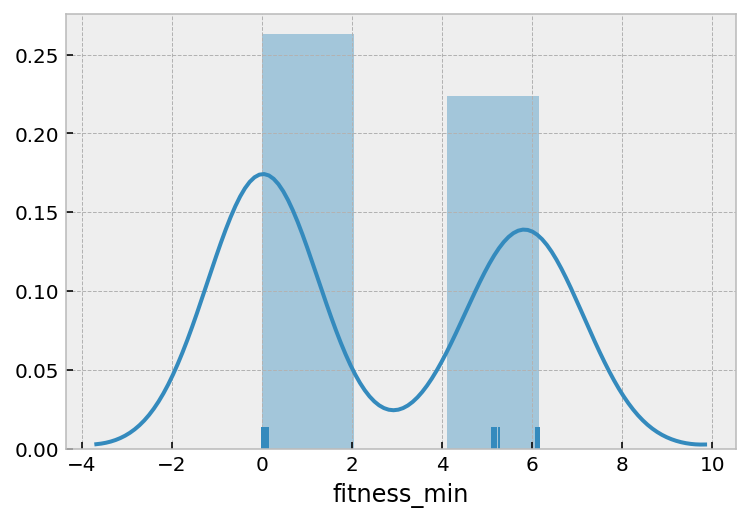

In [24]:
sns.distplot(fitness_res[query]["fitness_min"], rug=True)

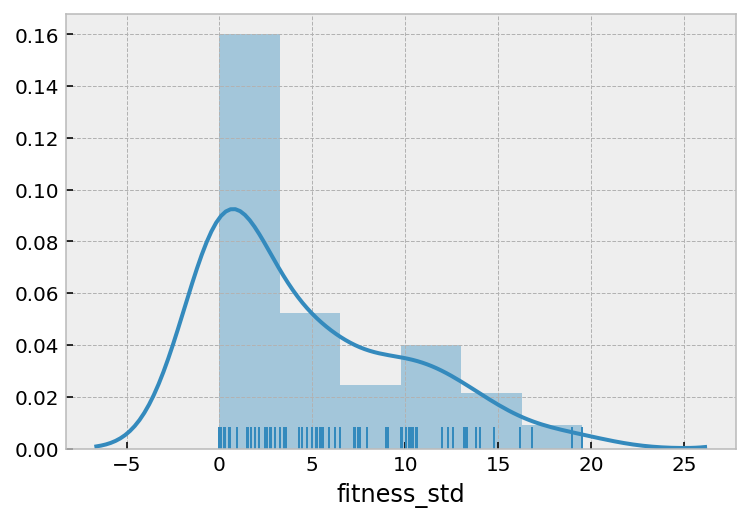

In [25]:
sns.distplot(fitness_res[query]["fitness_std"], rug=True)

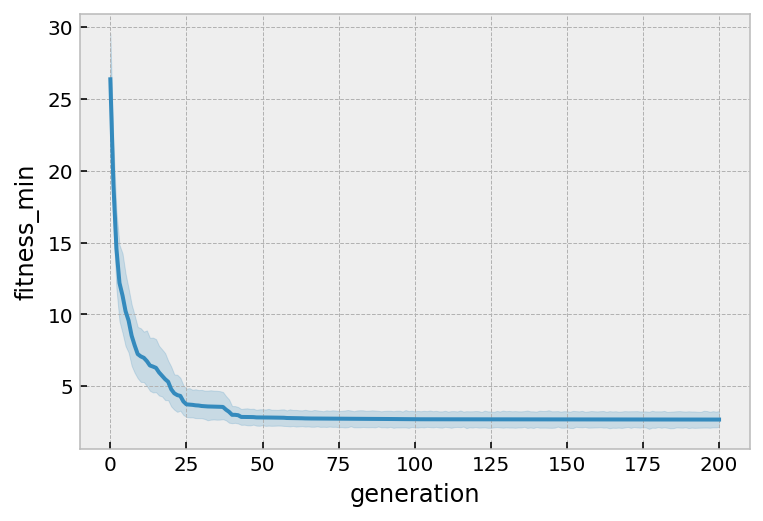

In [26]:
sns.lineplot(x="generation", y="fitness_min", data=fitness_res)